(c) 2016 - present. Enplus Advisors, Inc.

In [1]:
import numpy as np
import pandas as pd

from IPython.display import Image

pd.set_option('precision', 2)

# Programming with Data:<br>Advanced Python and Pandas

# Merge, Join, & Combine

## Types of Joins

* Inner
* Left
* Right
* Full

### Inner Join

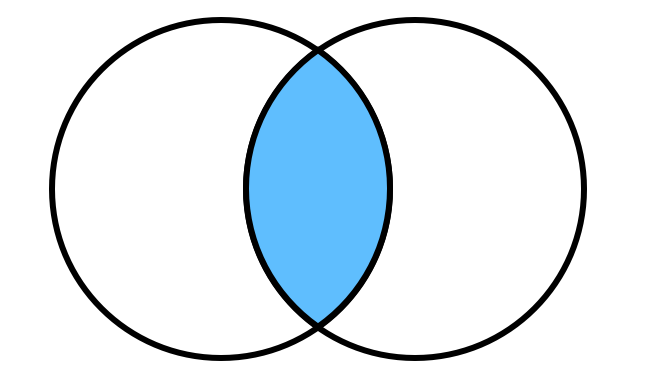

In [2]:
Image(filename='assets/inner-join.png', retina=True)

**TODO:** Show with a markdown table

### Left/Right Join

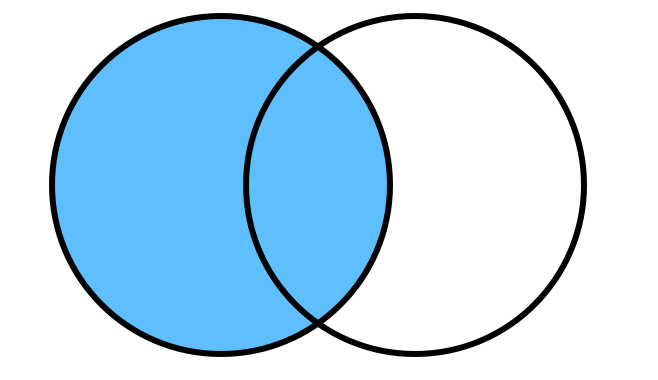

In [3]:
Image(filename='assets/left-join.png', retina=True)

### Full Join

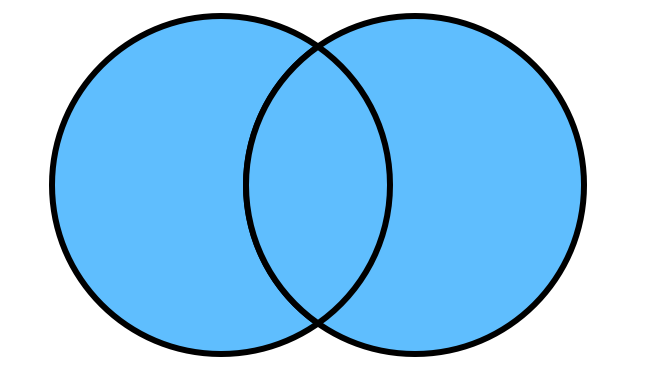

In [4]:
Image(filename='assets/full-join.png', retina=True)

## The Data

<img src="assets/stock-trading-1600x1200.jpg" width=700></img>

Photo by Chris Liverani on Unsplash

Going to use stock data because I used to work as a quant.

### Somewhat simple data

In [5]:
df1 = pd.DataFrame({
    'ticker': ['AAPL', 'MSFT', 'IBM', 'YHOO', 'GOOG'],
    'open': [426.23, 42.30, 101.65, 35.53, 200.41]
})
df1

,ticker,open
0,AAPL,426.23
1,MSFT,42.30
2,IBM,101.65
3,YHOO,35.53
4,GOOG,200.41


`df1` has ticker and `open` price (the price of the stock when the NYSE first opens at 0930)

### More somewhat simple data

Tickers and close prices. Additional ticker for `NFLX`.

In [6]:
df2 = pd.DataFrame({
    'ticker': ['AAPL', 'GOOG', 'NFLX'],
    'close': [427.53, 210.96, 91.86]
}, columns=['ticker', 'close'])
df2

,ticker,close
0,AAPL,427.53
1,GOOG,210.96
2,NFLX,91.86


## Coding an inner join

An inner join gives us the intersection of the keys.

In [7]:
df1m2 = pd.merge(df1, df2, on='ticker')
df1m2

,ticker,open,close
0,AAPL,426.23,427.53
1,GOOG,200.41,210.96


## Verifying the inner join

We drop everything except tickers that are present **both** data frames.

In [8]:
common_tickers = set(df1.ticker) & set(df2.ticker)
common_tickers

{'AAPL', 'GOOG'}

In [9]:
assert set(df1m2.ticker) == common_tickers

## Aside: 99% of the time, use `pd.merge`

Most flexible way to join two data frames


* `pd.concat` is more general - useful to join a collection (e.g. `list`) of data frames
* `pd.DataFrame.join` works in more specific circumstances

## Left Join

Include all keys from the `left` data frame.

In [10]:
df1m2_left = pd.merge(df1, df2, on='ticker', how='left')
df1m2_left

,ticker,open,close
0,AAPL,426.23,427.53
1,MSFT,42.30,NaN
2,IBM,101.65,NaN
3,YHOO,35.53,NaN
4,GOOG,200.41,210.96


In [11]:
assert set(df1.ticker) == set(df1m2_left.ticker)

## Filling missing levels

In [12]:
df1m2_left

,ticker,open,close
0,AAPL,426.23,427.53
1,MSFT,42.30,NaN
2,IBM,101.65,NaN
3,YHOO,35.53,NaN
4,GOOG,200.41,210.96


Notice that `pandas` fills missing levels from `df2` with `NaN`. Comparable to `SQL`
where values would be `NULL`.

## Right Join

Include all keys from the `right` data frame.

In [13]:
pd.merge(df1, df2, on='ticker', how='right')

,ticker,open,close
0,AAPL,426.23,427.53
1,GOOG,200.41,210.96
2,NFLX,NaN,91.86


Same missingness handling as `left` join.

## Outer/Full Join

In [14]:
df1m2_full = pd.merge(df1, df2, on='ticker', how='outer')
df1m2_full

,ticker,open,close
0,AAPL,426.23,427.53
1,MSFT,42.30,NaN
2,IBM,101.65,NaN
3,YHOO,35.53,NaN
4,GOOG,200.41,210.96
5,NFLX,NaN,91.86


In [15]:
assert set(df1.ticker) | set(df2.ticker) == set(df1m2_full.ticker)

## Concatenation/Binding

* Add rows\* (`append`)
* Add columns (`pd.concat`)
* Add rows and columns (`pd.concat` or `append`)

\* `append` will also add columns!

### Data for Concatenation

We're going to make this data explicitly **daily** so we're going to 
add a `date` column. Take the first two records only so the data
fits on the slide.

In [16]:
df3 = df1.assign(date=pd.datetime(2018, 1, 4))\
    .iloc[:2, ] # first 2 rows only
df3

,ticker,open,date
0,AAPL,426.23,2018-01-04
1,MSFT,42.30,2018-01-04


In [17]:
df4 = df3.assign(
    date=pd.datetime(2018, 1, 5),
    open=lambda x: x.open + 10
)
df4

,ticker,open,date
0,AAPL,436.23,2018-01-05
1,MSFT,52.30,2018-01-05


### Adding rows

In [18]:
df3.append(df4)

,ticker,open,date
0,AAPL,426.23,2018-01-04
1,MSFT,42.30,2018-01-04
0,AAPL,436.23,2018-01-05
1,MSFT,52.30,2018-01-05


Notice how the index is repeated and duplicated for the default `pd.RangeIndex`

### No dups please

To check for duplicated index values:

In [19]:
try:
    df3.append(df4, verify_integrity=True)
except ValueError as e:
    print(e)

Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


### Ignore the index

In [20]:
df3.append(df4, ignore_index=True)

,ticker,open,date
0,AAPL,426.23,2018-01-04
1,MSFT,42.30,2018-01-04
2,AAPL,436.23,2018-01-05
3,MSFT,52.30,2018-01-05


We usually don't need to validate the index when we pass `ignore_index`
because we're creating a new index!

### Rows and Columns with `append`

In [21]:
df3a = df3.assign(close=lambda x: (x.open + 9))
df3a

,ticker,open,date,close
0,AAPL,426.23,2018-01-04,435.23
1,MSFT,42.30,2018-01-04,51.30


### We've been warned

In [22]:
df3a.append(df4, ignore_index=True)

/Users/daniel/anaconda3/envs/pydata/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,close,date,open,ticker
0,435.23,2018-01-04,426.23,AAPL
1,51.30,2018-01-04,42.30,MSFT
2,NaN,2018-01-05,436.23,AAPL
3,NaN,2018-01-05,52.30,MSFT


### Probably the most common `append`

In [23]:
df3a.append(df4, ignore_index=True, sort=False)

,ticker,open,date,close
0,AAPL,426.23,2018-01-04,435.23
1,MSFT,42.30,2018-01-04,51.30
2,AAPL,436.23,2018-01-05,NaN
3,MSFT,52.30,2018-01-05,NaN


Anytime you're repeating code, put it in a function and stay `DRY` (Don't repeat yourself)

In [24]:
def pwd_append(x: pd.DataFrame, y: pd.DataFrame, **kwargs) -> pd.DataFrame:
    defaults = {
        'ignore_index': True,
        'sort': True,
        'verify_integrity': False 
    }
    defaults.update(kwargs)
    x.append(y, **defaults)